In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [11]:
train_shoe = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
test_shoe = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [22]:
trainImageData = train_shoe.flow_from_directory("../Datasets/nike_adidas_converse/train/",
                                                class_mode="categorical",
                                                target_size=(240,240))
testImageData = train_shoe.flow_from_directory("../Datasets/nike_adidas_converse/test/",
                                                class_mode="categorical",
                                                target_size=(240,240))

Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [23]:
trainImageData.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
trainImageData.class_indices

{'adidas': 0, 'converse': 1, 'nike': 2}

In [5]:
trainImageData.index_array

In [15]:
def build_model():
    model = models.Sequential()
    NO_CLASSES = 3
    # 1st block
    model.add(layers.Conv2D(16,(3,3),padding='same', input_shape=trainImageData.image_shape, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(16,(3,3), padding='same', activation ='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.MaxPooling2D( pool_size=(2,2)))
    

    model.add(layers.Conv2D(32,(3,3), padding='same', activation ='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32,(3,3), padding='same', activation ='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.MaxPooling2D( pool_size=(2,2)))
    


    
    model.add(layers.Conv2D(64,(3,3), padding='same', activation ='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64,(3,3), padding='same', activation ='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.MaxPooling2D( pool_size=(2,2)))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected layers
    model.add(layers.Dense(128, activation= 'relu'))
    model.add(layers.Dense(64, activation= 'relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(NO_CLASSES, activation= 'softmax'))

    #model.summery()
    return model

In [16]:
model = build_model()
model.compile(loss='categorical_crossentropy',optimizer='ADAM',metrics=['accuracy'])
model.summary()
model_hist=model.fit(trainImageData,validation_data=testImageData,epochs=10,batch_size=256)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 240, 240, 16)      64        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 240, 240, 16)      2320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 240, 240, 16)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 120, 120, 32)     

In [17]:
model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

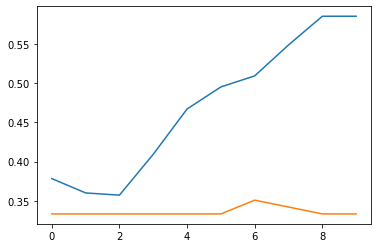

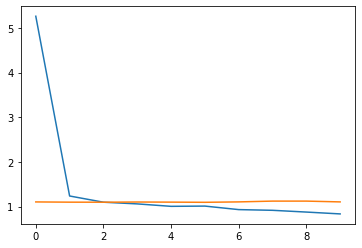

In [18]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.show()

plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.show()